<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/17July2024_GBM_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Down and Dirty

Initial average prediction: 0.297


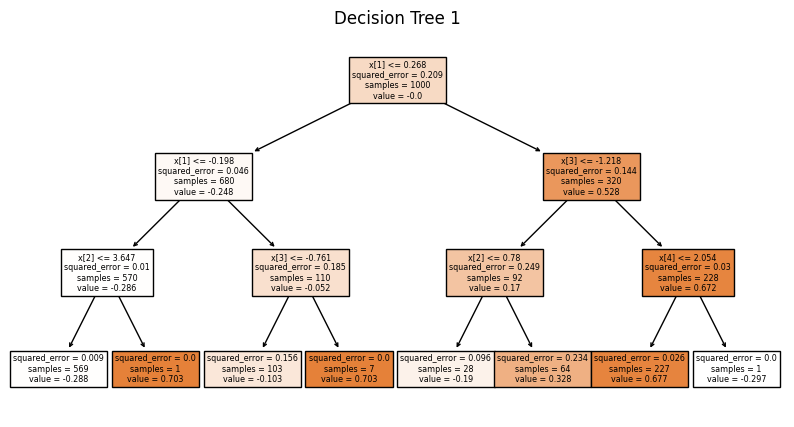

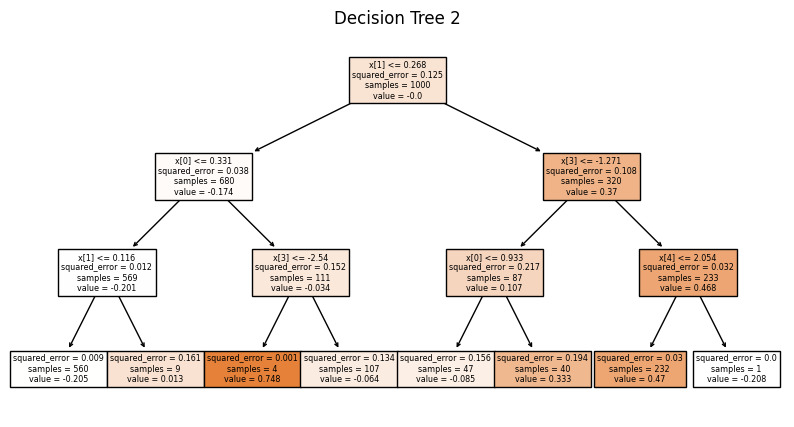

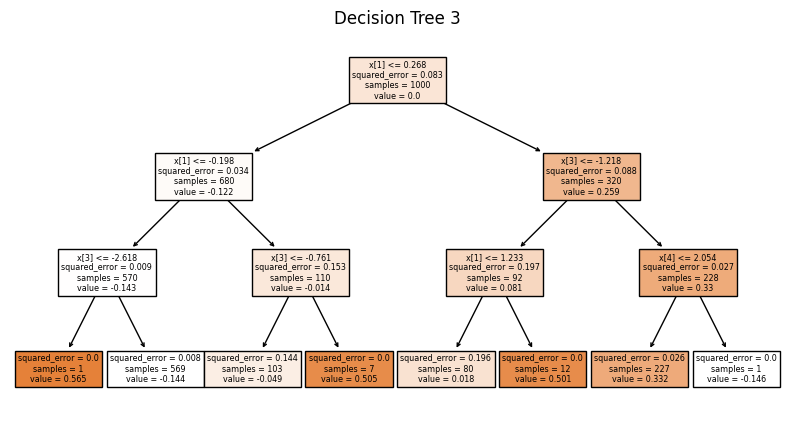

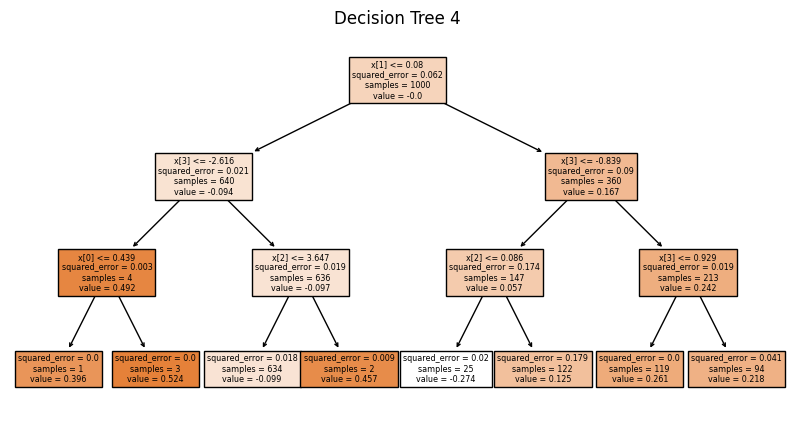

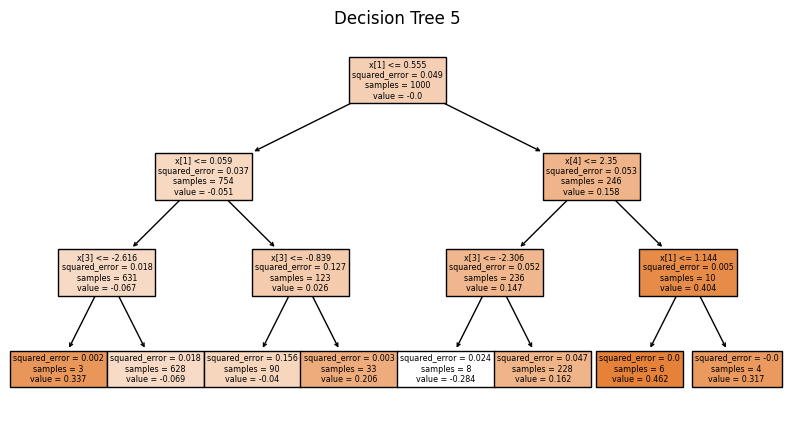

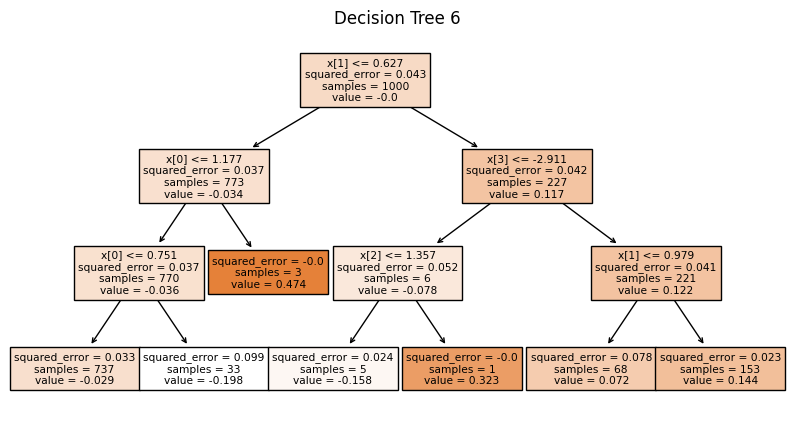

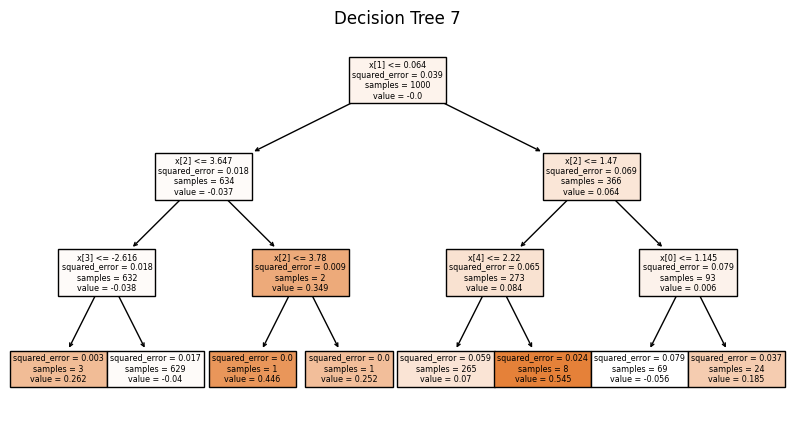

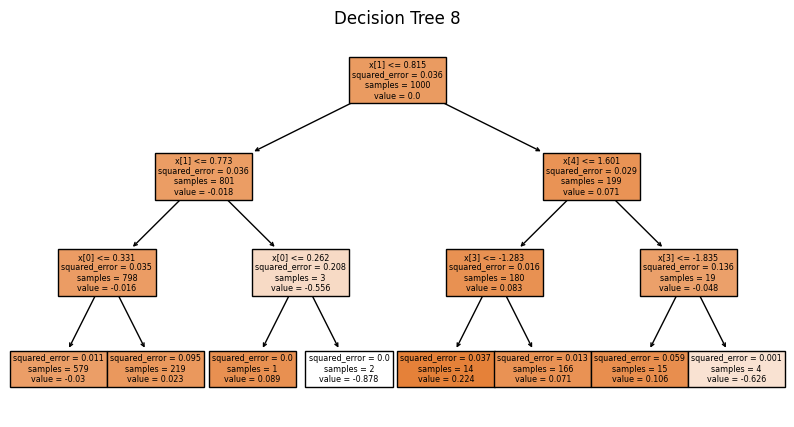

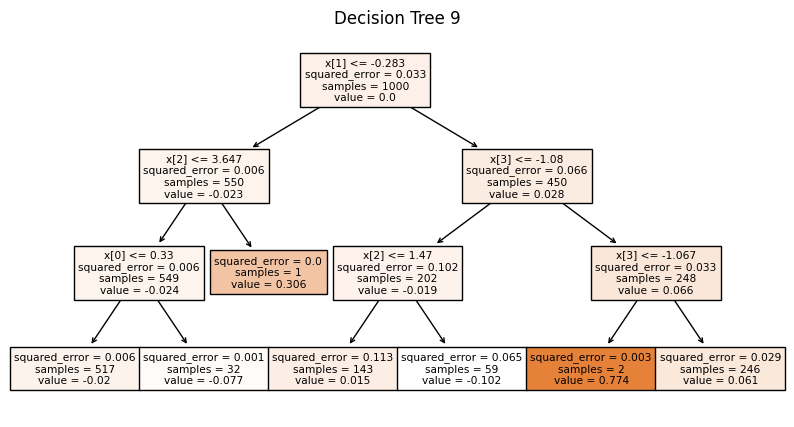

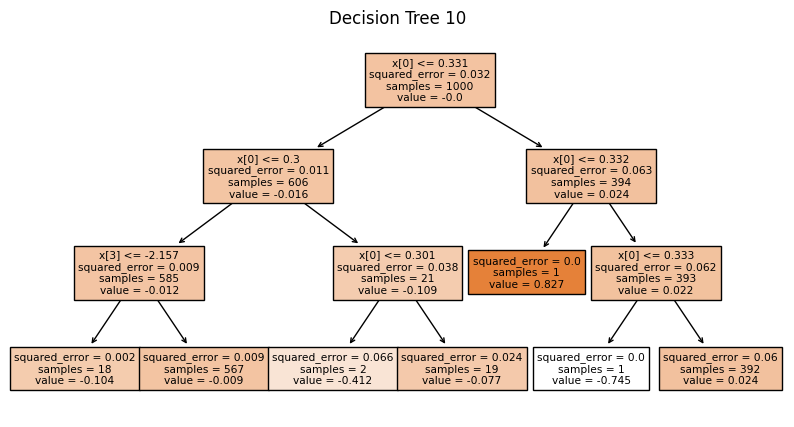

Initial average: Accuracy = 0.703
Tree 1: Accuracy = 0.711
Tree 2: Accuracy = 0.921
Tree 3: Accuracy = 0.946
Tree 4: Accuracy = 0.95
Tree 5: Accuracy = 0.952
Tree 6: Accuracy = 0.956
Tree 7: Accuracy = 0.958
Tree 8: Accuracy = 0.961
Tree 9: Accuracy = 0.962
Tree 10: Accuracy = 0.962


In [ ]:


# Generate a synthetic dataset
X, y = make_classification(n_samples=1000,
                           weights = [0.7,0.3],
                           n_features=5,
                           n_informative=3,
                           n_redundant=2,
                           random_state=42)

# Initialize lists to store models and accuracies
models = []
accuracies = []

# Create an initial average prediction (baseline)
y_pred_avg = np.mean(y)
print(f"Initial average prediction: {y_pred_avg}")

# Convert average prediction to the closest class (0 or 1) for all samples
initial_pred = np.zeros(y.shape)
initial_pred[:] = int(y_pred_avg >= 0.5)
initial_accuracy = accuracy_score(y, initial_pred)
models.append('Initial average')
accuracies.append(initial_accuracy)

# Train GBM model with 3 sequential trees
n_trees =10
learning_rate = 0.3

# Placeholder for cumulative predictions, starting with initial average
cumulative_pred = np.full(y.shape, y_pred_avg)

for i in range(n_trees):
    # Calculate residuals
    residuals = y - cumulative_pred

    # Train a decision tree on residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X, residuals)

    # Predict with the current tree and update cumulative predictions
    pred = tree.predict(X)
    cumulative_pred += learning_rate * pred

    # Convert to class labels for accuracy calculation
    cumulative_class_pred = np.where(cumulative_pred >= 0.5, 1, 0)
    accuracy = accuracy_score(y, cumulative_class_pred)
    models.append(f"Tree {i+1}")
    accuracies.append(accuracy)

    # Plot the current tree
    plt.figure(figsize=(10, 5))
    plot_tree(tree, filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

# Display accuracies
for model, acc in zip(models, accuracies):
    print(f"{model}: Accuracy = {acc}")
